# Bank Customer Churn Prediction

In [1]:
# importing all the libraries necessary for the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# loading the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.dropna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Pre-processing

In [6]:
#Droping the unnessesary columns and target column
x=data.drop(['RowNumber','CustomerId','Surname','Exited'], axis=1)
y=data['Exited']

In [7]:
x=pd.get_dummies(x,columns=['Geography','Gender'], drop_first=True)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Feature Scalling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Model Selection and Training

In [11]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation

In [12]:
y_pred=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test, y_pred)

In [13]:
# Calculating accuracy
print(f" Accuracy: {accuracy:.2f}")

 Accuracy: 0.87


In [14]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Defining parameter 
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [17]:
# Creating the model
model=RandomForestClassifier(random_state=42)

In [18]:
# Creating the GridSearchCV object
grid_search=GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

Hyperparameter Tuning

In [19]:
# Object to data
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [20]:
print("Best Parameters:",grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.866


Interpretation and Further Analysis

In [21]:
# Training the model
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [22]:
feature_importances=model.feature_importances_

In [24]:
# Creating a dataframe for accosiation
feature_importance_df=pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

In [25]:
# Sorting in descending order
feature_importance_df=feature_importance_df.sort_values(by='Importance', ascending=False)

In [30]:
top_n=10
print(f"Top {top_n}Features:")
print(feature_importance_df.head(top_n))

Top 10Features:
              Feature  Importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421


In [31]:
# Visualising
import matplotlib.pyplot as plt

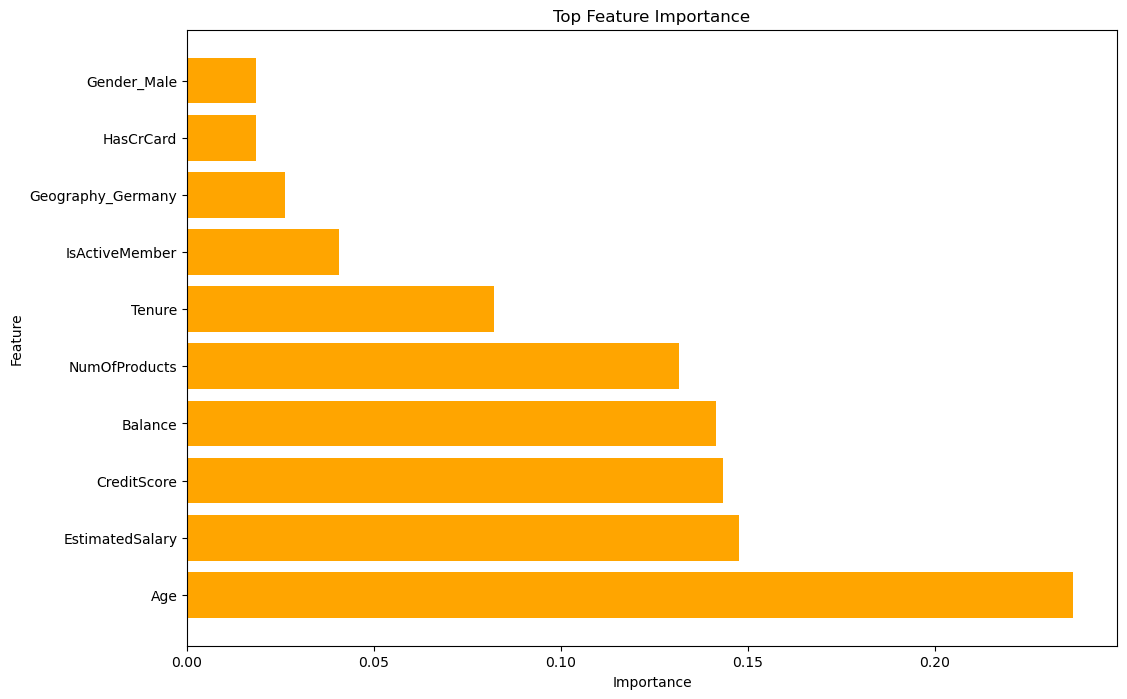

In [58]:
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'][:top_n],feature_importance_df['Importance'][:top_n], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importance')
plt.show()

Correlation Analysis

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
correlation_data=pd.concat([x_train,y_train],axis=1)

In [61]:
correlation_matrix=correlation_data.corr()

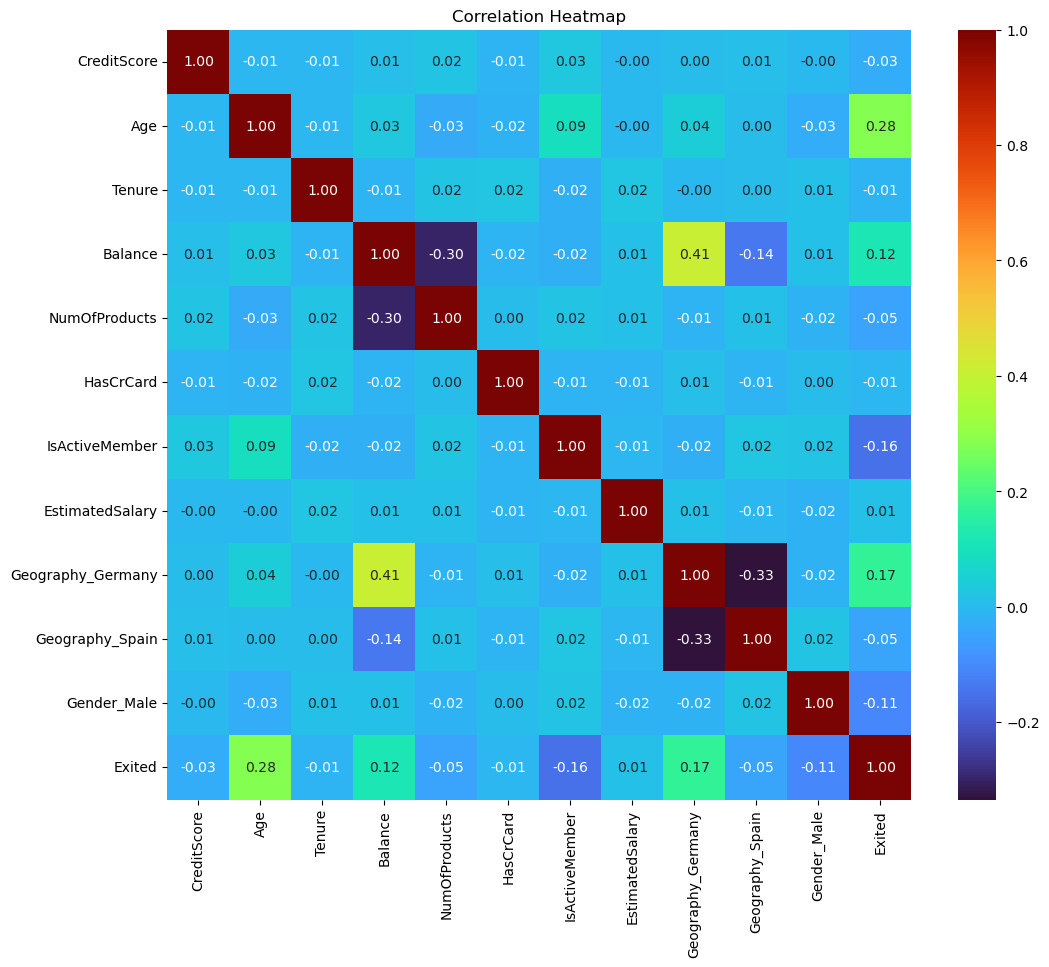

In [52]:
# Plot a heat map of the correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='turbo', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [55]:
# Calculating correlation features and churn
churn_correlations=correlation_matrix['Exited'].drop('Exited')
churn_correlations=churn_correlations.sort_values(ascending=False)

In [57]:
print('Correlations with Churn:')
print(churn_correlations)

Correlations with Churn:
Age                  0.283173
Geography_Germany    0.169537
Balance              0.118418
EstimatedSalary      0.010889
HasCrCard           -0.006471
Tenure              -0.013352
CreditScore         -0.029307
Geography_Spain     -0.047172
NumOfProducts       -0.051009
Gender_Male         -0.106478
IsActiveMember      -0.156560
Name: Exited, dtype: float64
